# Logistic Regression "by hand"

## Data points

We are predicting whether someone is obese based on weight.

In [1]:
import pandas as pd

df = pd.DataFrame()
df['weight'] = [80,85,88,90,96,100,105]
df['obese'] = [0,0,1,0,1,1,1]

df

,weight,obese
0,80,0
1,85,0
2,88,1
3,90,0
4,96,1
5,100,1
6,105,1


In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['weight'], df['obese'])
plt.xticks(df['weight'])
plt.yticks(df['obese'])
plt.xlabel('weight')
plt.ylabel('Obese')
plt.title('Scatter Plot of Weight vs Obese')
plt.show()

<Figure size 640x480 with 1 Axes>

## Logistic Regression from scratch

Logistic regression is a linear classifier, so we'll use a linear function 
$$ f(x) = b_0 + b_1 x_1 + ... + b_r x_r$$

The variables $b_0, b_1,...,b_r$ are the estimators of the regression coefficients, which are also called the predicted weights.

The logistic regression function $p(x)$ is the sigmoid function of $f(x)$.

$$ p(x) = \dfrac{1}{1+e^{-f(x)}}$$

In our case, $r=1$ as we only have one predictor.

So $$f(x) = b_0 + b_1 x_1 $$
and
$$ p(x) = \dfrac{1}{1+e^{-b_0 - b_1x}}$$

The function $p(x)$ is often interpreted as the predicted probability that the output for a given $x$ is equal to 1.

Logistic regression determines the best predicted weights $b_0, b_1,...,b_r$ such that the function $p(x)$ is as close as possible to all actual responses $y_i$, $i = 1,..., n$ where $n$ is the number of observations. 

To get the best weights, we maximize the log-likelihood function (LLF) for all observations $i = 1,..., n$. This method is called the maximum likelihood estimation and is represented by the equation 
$$ LLF = \sum_i(y_i log(p(x_i)) + (1 − y_i) log(1 − p(x_i))) $$

### First attempt: ignoring intercept

In logistic regression, we start by taking the input data, `X`, and multiplying it by a vector of weights for each of the individual features, which produces an output, `y`.

$\large \hat{y}_i = X_{i1} \cdot w_1 + X_{i2} \cdot w_2 + X_{i3} \cdot w_3 + ... + X_{in} \cdot w_n$

Here we only have one predictor, so we can write:

$\large \hat{y}_i = X_{i} \cdot w_1$

where 

$$ X_{i} = \left[ {\begin{array}{c}
    80 \\
    85 \\
    88 \\
    90 \\
    96 \\
    100 \\
    105 \end{array} } \right]
 $$

In [3]:
# Define X
X = np.array(df['weight']).reshape(-1,1)
X.shape

(7, 1)

For initial weight, let us take a vector `1` . We will use gradient descent to find the optimal values for the weight.

In [4]:
# Set initial weight
w = [1]

Let us generate predictions using this weight.

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
predictions = sigmoid(np.dot(X, w))
predictions 

array([1., 1., 1., 1., 1., 1., 1.])

As we can see our initial predictions are always positive.

Let us calculate an error vector based on these initial predictions and the correct y values.

In [7]:
# Define y
y = df['obese']

In [8]:
error_vector = y - predictions
error_vector

0   -1.0
1   -1.0
2    0.0
3   -1.0
4    0.0
5    0.0
6    0.0
Name: obese, dtype: float64

In [9]:
gradient = np.dot(X.transpose(), error_vector)
gradient

array([-255.])

The new weight will be the old weight and a small step in the direction of the gradient. 

In [10]:
new_w = w + 0.01*gradient
new_w

array([-1.55])

In [11]:
new_predictions = sigmoid(np.dot(X, new_w))
new_predictions

array([1.40437873e-54, 6.04925663e-58, 5.78405839e-60, 2.60567217e-61,
       2.38221576e-65, 4.83454164e-68, 2.08244275e-71])

In [12]:
error_vector = y - new_predictions
error_vector

0   -1.404379e-54
1   -6.049257e-58
2    1.000000e+00
3   -2.605672e-61
4    1.000000e+00
5    1.000000e+00
6    1.000000e+00
Name: obese, dtype: float64

In [13]:
gradient = np.dot(X.transpose(), error_vector)
gradient

array([389.])

In [14]:
new_w = w + 0.01*gradient
new_w

array([4.89])

In [15]:
new_predictions = sigmoid(np.dot(X, new_w))
new_predictions

array([1., 1., 1., 1., 1., 1., 1.])

In [16]:
def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights is None:
        initial_weights = np.ones((X.shape[1], 1)).flatten()
    weights_col = pd.DataFrame(initial_weights)
    weights = initial_weights
    # Create a for loop of iterations
    for iteration in range(max_iterations):
        # Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X, weights))
        # Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        # Calculate the gradient 
        # As we saw in the previous lab, calculating the gradient is often the most difficult task.
        # Here, your are provided with the closed form solution for the gradient of the log-loss function derived from MLE
        # For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(), error_vector)
        # Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
        weights_col = pd.concat([weights_col, pd.DataFrame(weights)], axis=1)
    # Return finalized weights
    return weights, weights_col

In [17]:
w,w_col = grad_desc(X, y, max_iterations = 10000, alpha = 0.0001)
w

array([0.00455642])

In [18]:
# Get predictions with best w
y_hat = sigmoid(np.dot(X, w))
y_hat 

array([0.59013265, 0.59563157, 0.59891953, 0.60110658, 0.60764327,
       0.61197988, 0.61737573])

### Adding intercept

In [19]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [20]:
# Define X and y
X = np.array(df['weight']).reshape(-1,1)
y = np.array(df['obese'])

In [21]:
# Add ones to X
X = np.insert(X, 0, values=1, axis=1)
X

array([[  1,  80],
       [  1,  85],
       [  1,  88],
       [  1,  90],
       [  1,  96],
       [  1, 100],
       [  1, 105]])

In [22]:
# Choose starting values of b (weights)
zeroes = [0] * X.shape[1]
b = np.array([zeroes]).T
print(b)

[[0]
 [0]]


In [23]:
# Defining the learning rate
learning_rate = 0.01

In [24]:
# Define y_pred using dot product
y_pred = sigmoid(np.dot(X, b))
print(X.shape, b.shape, y_pred.shape)

(7, 2) (2, 1) (7, 1)


In [25]:
y_pred

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

In [26]:
y.reshape(-1,1)

array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1]])

In [27]:
# Define error
error = y.reshape(-1,1) - y_pred
error

array([[-0.5],
       [-0.5],
       [ 0.5],
       [-0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5]])

In [28]:
gradient = np.dot(X.transpose(), error)
gradient

array([[ 0.5],
       [67. ]])

In [29]:
new_b = b + learning_rate * gradient
new_b

array([[0.005],
       [0.67 ]])

In [30]:
# Get new predictions
y_pred = sigmoid(np.dot(X, new_b))
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [31]:
error = y.reshape(-1,1) - y_pred

In [32]:
gradient = np.dot(X.transpose(), error)
gradient

array([[  -3.],
       [-255.]])

In [33]:
newer_b = new_b + learning_rate * gradient
newer_b

array([[-0.025],
       [-1.88 ]])

In [34]:
# Define X and y
X = np.array(df['weight']).reshape(-1,1)
y = np.array(df['obese'])

# Add ones to X
X = np.insert(X, 0, values=1, axis=1)

# Choose starting values of b (weights)
zeroes = [0] * X.shape[1]
b = np.array([zeroes]).T

# Defining the learning rate
learning_rate = 0.01

# Threshold for iterating the loop
max_iter = 1000

# Appending all new values of b 
b_vals = []
for i in range(max_iter):
    y_pred = sigmoid(np.dot(X,b))
    error = y.reshape(-1,1) - y_pred
    gradient = np.dot(X.transpose(), error)
    b = b + learning_rate * gradient
    b_vals.append(b)
top_b = b_vals[max_iter-1]
print(top_b)

[[-2.25325109]
 [ 2.55516856]]


In [35]:
b = np.array([-2.25325109,2.55516856]).T
y_pred = sigmoid(np.dot(X, top_b))
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [36]:
w,w_col = grad_desc(X, y, max_iterations = 10000, alpha = 0.0001)
w

array([ 0.75504113, -0.00358781])

## Using scikit-learn

### Without intercept

In [37]:
from sklearn.linear_model import LogisticRegression

X = np.array(df['weight']).reshape(-1,1)
y = df['obese']

logit = LogisticRegression(fit_intercept = False, C = 1e17, solver = 'liblinear')
model = logit.fit(X,y)

In [38]:
# Get coef
model.coef_

array([[0.00455638]])

In [39]:
# Get coef
model.intercept_

0.0

In [40]:
# Get predictions
y_pred = model.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1])

In [41]:
# Get predictions as probabilities
y_pred_proba = model.predict_proba(X)
y_pred_proba

array([[0.40986822, 0.59013178],
       [0.40436936, 0.59563064],
       [0.40108143, 0.59891857],
       [0.39889439, 0.60110561],
       [0.39235776, 0.60764224],
       [0.38802119, 0.61197881],
       [0.38262539, 0.61737461]])

The two columns for each array are probabilities for class 0 and class 1 respectively. 

In [42]:
# Get residuals
residuals = abs(y_pred - y)

# Get accuracy
pd.Series(residuals).value_counts(normalize = True)

0    0.571429
1    0.428571
Name: obese, dtype: float64

In [43]:
# compute confusion matrix

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y, y_pred)
cnf_matrix

array([[0, 3],
       [0, 4]])

In [44]:
# compute auc

from sklearn.metrics import roc_curve, auc
y_score = model.decision_function(X)
fpr, tpr, thresholds = roc_curve(y, y_score)
auc = auc(fpr, tpr)
auc

0.9166666666666667

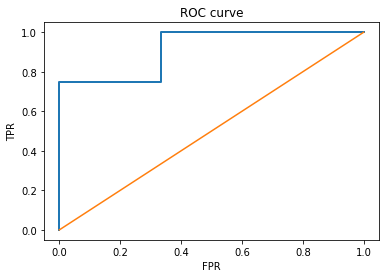

In [45]:
# plot roc curve
plt.plot(fpr, tpr, lw = 2, label = 'ROC curve')
plt.plot([0,1],[0,1])
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.57      1.00      0.73         4

    accuracy                           0.57         7
   macro avg       0.29      0.50      0.36         7
weighted avg       0.33      0.57      0.42         7



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### With intercept

In [47]:
X = np.array(df['weight']).reshape(-1,1)
y = df['obese']

logit = LogisticRegression(fit_intercept = True, C = 1e17, solver = 'liblinear')
model = logit.fit(X,y)

In [48]:
# Get coef
model.coef_

array([[0.42543078]])

In [49]:
# Get coef
model.intercept_

array([-38.03463636])

In [50]:
# Get predictions
y_pred = model.predict(X)
y_pred

array([0, 0, 0, 1, 1, 1, 1])

In [51]:
# Get predictions as probabilities
y_pred_proba = model.predict_proba(X)
y_pred_proba

array([[0.98201687, 0.01798313],
       [0.86680738, 0.13319262],
       [0.6449074 , 0.3550926 ],
       [0.43680639, 0.56319361],
       [0.05696222, 0.94303778],
       [0.0108956 , 0.9891044 ],
       [0.00131108, 0.99868892]])

In [52]:
# Get residuals
residuals = abs(y_pred - y)

# Get accuracy
pd.Series(residuals).value_counts(normalize = True)

0    0.714286
1    0.285714
Name: obese, dtype: float64

In [53]:
cnf_matrix = confusion_matrix(y, y_pred)
cnf_matrix

array([[2, 1],
       [1, 3]])

In [57]:
y_score = model.decision_function(X)

fpr, tpr, thresholds = roc_curve(y, y_score)

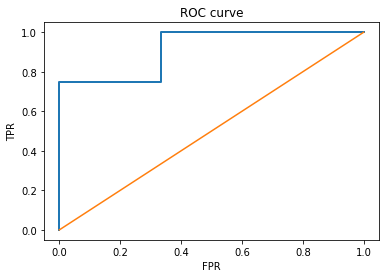

In [58]:
plt.plot(fpr, tpr, lw = 2, label = 'ROC curve')
plt.plot([0,1],[0,1])
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [59]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.75      0.75      0.75         4

    accuracy                           0.71         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.71      0.71      0.71         7

